# Лабораторна робота №2
## Тема: sklearn.datasets.make_regression
### Завдання
1. Поглиблено вивчити функцію make_regression.
2. Згенерувати набір даних за допомогою означеної функції, з використанням якнайбільшої кількості параметрів.
3. Розмірність набору даних прийняти у вигляді (100000х(30-n)), де n - номер за списком.
4. Здійснити моделювання згенерованого набору даних та візуалізацію результатів.
5. Результати оформити у вигляді файлів:
- набір даних у форматі .csv
- код для формування набору даних у форматі .ipynb
- код для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab2).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

## Виконала
### студентка 4 курсу
### групи АнД-41
### Кліменкова Ніна
### Варіант 7

## Бібліотеки

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae ,mse
from tensorflow.keras.optimizers import SGD, Adam

## Data preprocessing

In [14]:
#читаємо дані
dataset = pd.read_csv('data.csv', header = None, skiprows = 1)
dataset = dataset.drop(columns=dataset.columns[0], axis=1, inplace=False)
dataset.head()


1         2         3         4         5         6         7   \
0  0.000952 -0.000077  0.000559 -0.002689 -0.000443  0.000652 -0.002681   
1 -0.000847 -0.000266 -0.001744  0.001408 -0.000315  0.000944 -0.001296   
2  0.002899 -0.000580  0.001381 -0.000790 -0.001831  0.002385  0.000445   
3 -0.000854  0.000516 -0.001389 -0.002680  0.002330 -0.000086 -0.002844   
4  0.000842 -0.000245 -0.000520 -0.002009  0.000973  0.000560 -0.003396   

         8         9         10  ...        14        15        16        17  \
0  0.001208  0.001093  0.001558  ...  0.000961  0.002266 -0.003390  0.000654   
1  0.000964 -0.001317 -0.000281  ...  0.002185  0.001144 -0.000818  0.000447   
2 -0.001546 -0.000095 -0.001207  ... -0.001808 -0.000526 -0.000598 -0.001922   
3  0.002700  0.004794  0.000736  ...  0.001386  0.002187  0.000934  0.004605   
4  0.002138  0.004800  0.001333  ...  0.003441  0.003538  0.001198 -0.000305   

         18        19        20        21        22        23  
0 -0.002138  0.005076  0.001221  0.000378 -0.000583  0.110851  
1 -0.001365  0.002786 -0.002331 -0.000654 -0.001025 -0.477818  
2  0.000768 -0.003192 -0.001134 -0.000853 -0.001901 -0.368257  
3  0.001618  0.001789  0.000252  0.000536 -0.001436 -0.181635  
4 -0.001277  0.002795  0.002780  0.000570 -0.001142  0.032564  

[5 rows x 23 columns]

In [16]:
dataset.shape

(100000, 23)

 ## Створення моделі

In [29]:
X = dataset.drop(columns=dataset.iloc[:,-1:], axis=1)
Y = dataset.iloc[:,-1:]
#розділяємо на тренувальну, валідаційну та тестувальну вибірки
X_train, x_val, Y_train, y_val = train_test_split(X,Y, test_size=0.2)
x_val, X_test, y_val, Y_test = train_test_split(x_val,y_val, test_size=0.5)

In [31]:
#X_train.shape
#X_test.shape
#x_val.shape

(10000, 22)

In [71]:
tf.random.set_seed(49)
model = Sequential([Dense(10),Dense(1)])
model.compile(loss=mae, optimizer=SGD(), metrics=[mae])
history = model.fit(X_train,Y_train, epochs = 5, batch_size = 100,validation_data=(x_val,y_val))

Epoch 1/5
800/800 [==============================] - 1s 654us/step - loss: 0.2862 - mean_absolute_error: 0.2862 - val_loss: 0.2842 - val_mean_absolute_error: 0.2842
Epoch 2/5
800/800 [==============================] - 0s 553us/step - loss: 0.2862 - mean_absolute_error: 0.2862 - val_loss: 0.2842 - val_mean_absolute_error: 0.2842
Epoch 3/5
800/800 [==============================] - 0s 553us/step - loss: 0.2862 - mean_absolute_error: 0.2862 - val_loss: 0.2842 - val_mean_absolute_error: 0.2842
Epoch 4/5
800/800 [==============================] - 0s 563us/step - loss: 0.2862 - mean_absolute_error: 0.2862 - val_loss: 0.2844 - val_mean_absolute_error: 0.2844
Epoch 5/5
800/800 [==============================] - 1s 880us/step - loss: 0.2862 - mean_absolute_error: 0.2862 - val_loss: 0.2842 - val_mean_absolute_error: 0.2842


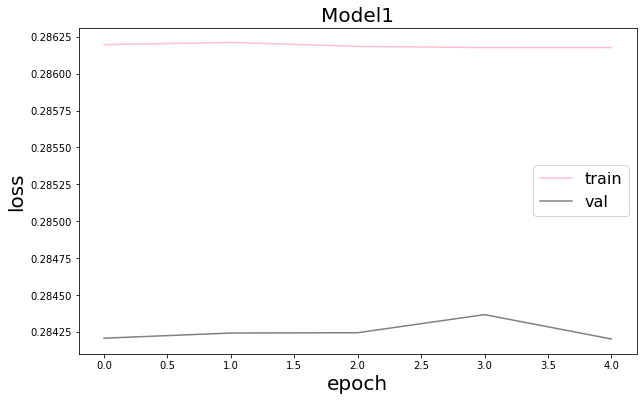

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history.history['loss'], 'pink', label='train')
ax.plot(history.history['val_loss'], 'grey' ,label='val')
ax.set_xlabel(r'epoch', fontsize=20)
ax.set_ylabel(r'loss', fontsize=20)
ax.legend()
plt.title("Model1", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

## Налаштовуэмо модель

In [49]:
tf.random.set_seed(49)
new_model = Sequential([Dense(10),Dense(20)])
new_model.compile(loss=mae, optimizer=Adam(), metrics=[mae])
new_history = new_model.fit(X_train,Y_train, epochs = 10, batch_size = 100,validation_data=(x_val,y_val))

Epoch 1/10
800/800 [==============================] - 1s 970us/step - loss: 0.2821 - mean_absolute_error: 0.2821 - val_loss: 0.2709 - val_mean_absolute_error: 0.2709
Epoch 2/10
800/800 [==============================] - 1s 875us/step - loss: 0.2651 - mean_absolute_error: 0.2651 - val_loss: 0.2560 - val_mean_absolute_error: 0.2560
Epoch 3/10
800/800 [==============================] - 1s 706us/step - loss: 0.2537 - mean_absolute_error: 0.2537 - val_loss: 0.2453 - val_mean_absolute_error: 0.2453
Epoch 4/10
800/800 [==============================] - 1s 710us/step - loss: 0.2457 - mean_absolute_error: 0.2457 - val_loss: 0.2388 - val_mean_absolute_error: 0.2388
Epoch 5/10
800/800 [==============================] - 1s 796us/step - loss: 0.2414 - mean_absolute_error: 0.2414 - val_loss: 0.2359 - val_mean_absolute_error: 0.2359
Epoch 6/10
800/800 [==============================] - 1s 840us/step - loss: 0.2401 - mean_absolute_error: 0.2401 - val_loss: 0.2360 - val_mean_absolute_error: 0.2360
Epoc

In [73]:
Y_test.shape

(10000, 1)

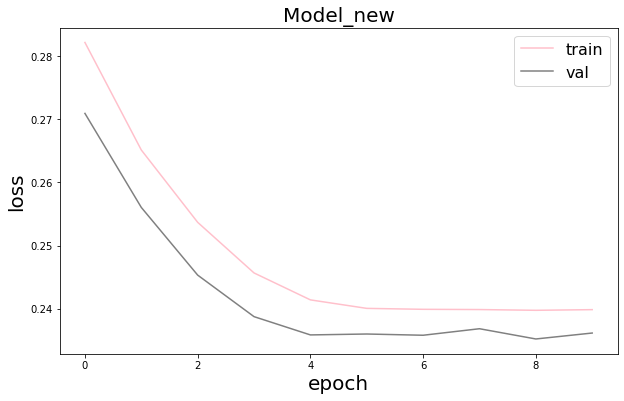

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(new_history.history['loss'], 'pink', label='train')
ax.plot(new_history.history['val_loss'], 'grey' ,label='val')
ax.set_xlabel(r'epoch', fontsize=20)
ax.set_ylabel(r'loss', fontsize=20)
ax.legend()
plt.title("Model_new", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

## Явище оверфітінгу(якого не вдалось досягти)

In [53]:
tf.random.set_seed(49)
model_over = Sequential([Dense(20),Dense(10),Dense(1)])
model_over.compile(loss=mae, optimizer=Adam(), metrics=[mae])
history_over = model_over.fit(X_train,Y_train, epochs = 100, batch_size = 300,validation_data=(x_val,y_val))

Epoch 1/100
267/267 [==============================] - 1s 1ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - val_loss: 0.2623 - val_mean_absolute_error: 0.2623
Epoch 2/100
267/267 [==============================] - 0s 802us/step - loss: 0.2546 - mean_absolute_error: 0.2546 - val_loss: 0.2407 - val_mean_absolute_error: 0.2407
Epoch 3/100
267/267 [==============================] - 0s 814us/step - loss: 0.2419 - mean_absolute_error: 0.2419 - val_loss: 0.2352 - val_mean_absolute_error: 0.2352
Epoch 4/100
267/267 [==============================] - 0s 781us/step - loss: 0.2414 - mean_absolute_error: 0.2414 - val_loss: 0.2352 - val_mean_absolute_error: 0.2352
Epoch 5/100
267/267 [==============================] - 0s 788us/step - loss: 0.2403 - mean_absolute_error: 0.2403 - val_loss: 0.2352 - val_mean_absolute_error: 0.2352
Epoch 6/100
267/267 [==============================] - 0s 796us/step - loss: 0.2402 - mean_absolute_error: 0.2402 - val_loss: 0.2351 - val_mean_absolute_error: 0.2351


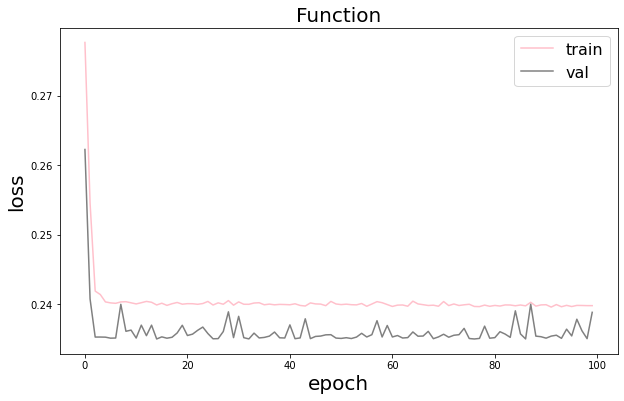

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_over.history['loss'], 'pink', label='train')
ax.plot(history_over.history['val_loss'], 'grey' ,label='val')
ax.set_xlabel(r'epoch', fontsize=20)
ax.set_ylabel(r'loss', fontsize=20)
ax.legend()
plt.title("Function", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

In [52]:
tf.random.set_seed(49)
model_complex = Sequential([Dense(30),Dense(20),Dense(10),Dense(1)])
model_complex.compile(loss=mae, optimizer=Adam(), metrics=[mae])
history_complex = model_complex.fit(X_train,Y_train, epochs = 20, batch_size = 256,validation_data=(x_val,y_val))

Epoch 1/20
313/313 [==============================] - 1s 1ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - val_loss: 0.2491 - val_mean_absolute_error: 0.2491
Epoch 2/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - val_loss: 0.2359 - val_mean_absolute_error: 0.2359
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - val_loss: 0.2368 - val_mean_absolute_error: 0.2368
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - val_loss: 0.2375 - val_mean_absolute_error: 0.2375
Epoch 5/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - val_loss: 0.2352 - val_mean_absolute_error: 0.2352
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - val_loss: 0.2393 - val_mean_absolute_error: 0.2393
Epoch 7/20
313/3

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_complex.history['loss'], 'pink', label='train')
ax.plot(history_complex.history['val_loss'], 'grey' ,label='val')
ax.set_xlabel(r'epoch', fontsize=20)
ax.set_ylabel(r'loss', fontsize=20)
ax.legend()
plt.title("Function", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)


## Прогноз

In [56]:
Y_hat = model.predict(X_test)
Y_hat_new = new_model.predict(X_test)
Y_hat_over = model_over.predict(X_test)
Y_hat_complex = model_complex.predict(X_test)

In [74]:
Y_hat_new.shape

(10000, 20)

## Візуалізація

ValueError: x and y must be the same size

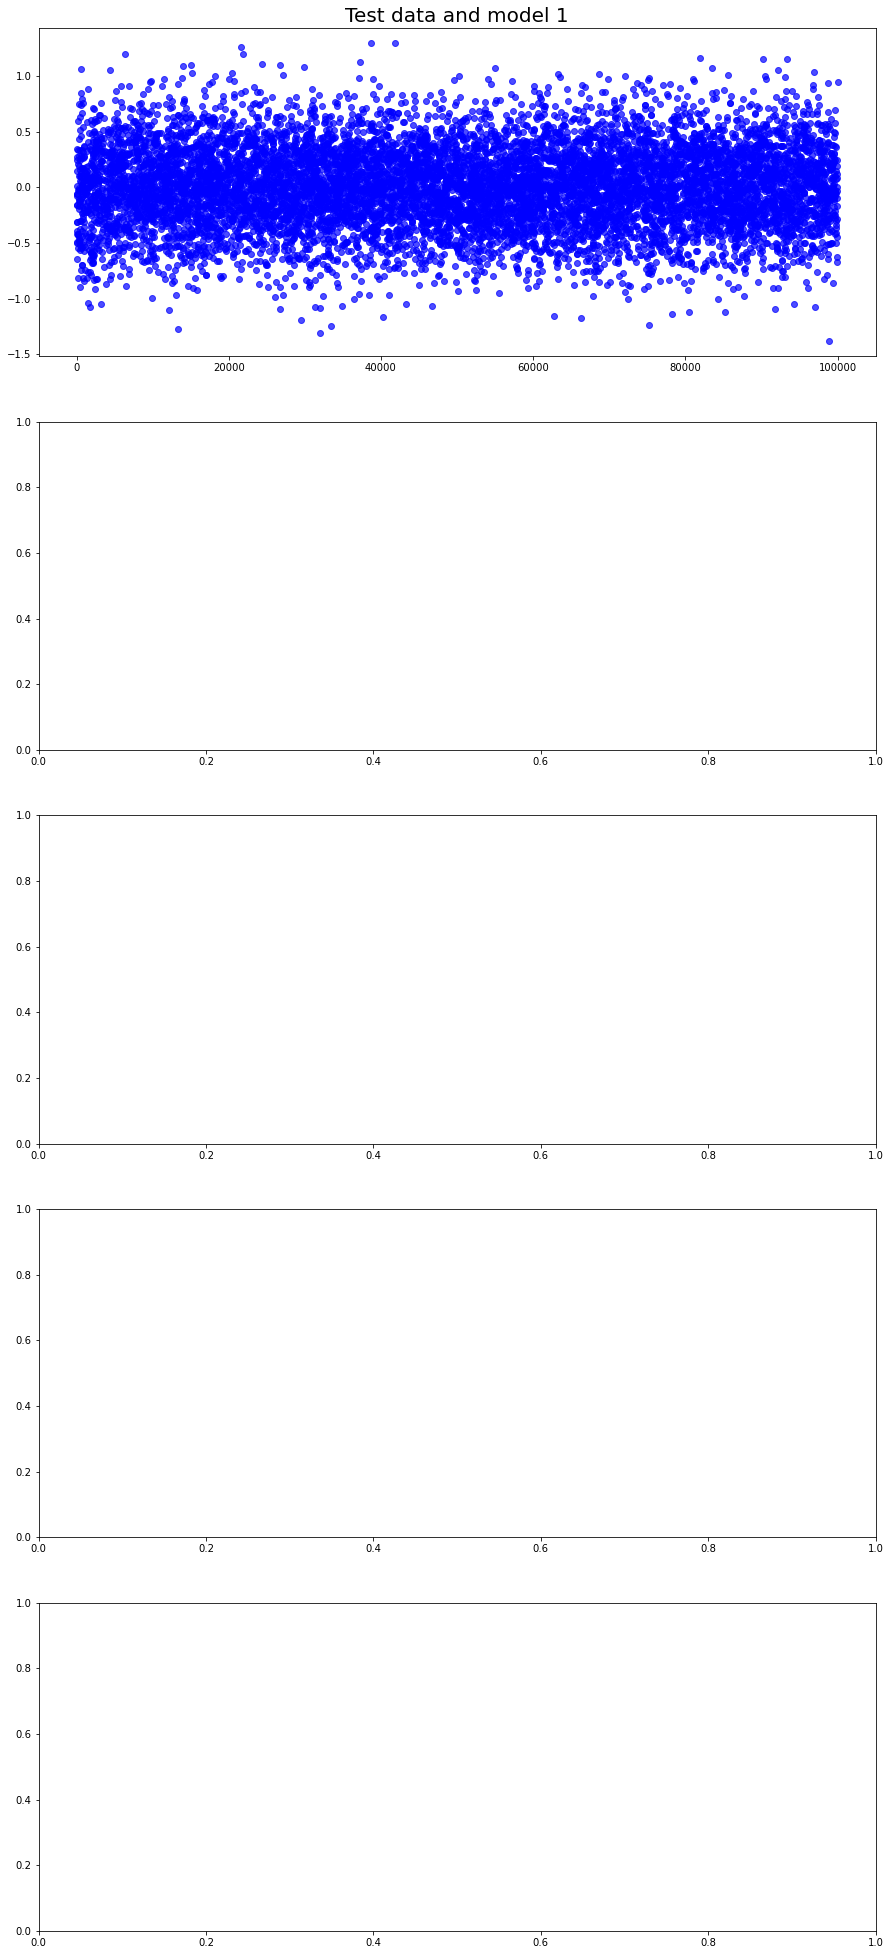

In [59]:
fig,axs = plt.subplots(5, figsize=(15, 35))
axs[0].set_title('Test data and model 1',fontsize=20)
axs[0].scatter(X_test.index, Y_test, c='b', label='Test data')
axs[0].scatter(X_test.index, Y_hat, c='r', label='First model')
axs[1].set_title('Test data and model new',fontsize=20)
axs[1].scatter(X_test.index, Y_test, c='b', label='Test data')
axs[1].scatter(X_test.index, Y_hat_new, c='r', label='New model')
axs[2].set_title('Test data and model overfitting',fontsize=20)
axs[2].scatter(X_test.index, Y_test, c='b', label='Test data')
axs[2].scatter(X_test.index, Y_hat_over, c='r', label='Overfitting model')
axs[3].set_title('Test data and model complex',fontsize=20)
axs[3].scatter(X_test.index, Y_test, c='b', label='Test data')
axs[3].scatter(X_test.index, Y_hat_complex, c='r', label='Complex model')
